# Simulating with P-regulator using scipy.solve_ivp

[aspicc notebook](https://aspicc.fs.cvut.cz/jupyter/user/roman_dusek/notebooks/courseware/UI%20P4.0/0%20tutorialy/Dynamicke%20Systemy%20-%20ODE%20simulace%20spoj.%20dyn.%20systemu%20%20(Python%203).ipynb)

$$
\begin{bmatrix}
&x_1^{'}(t)&\\
&x_2^{'}(t)&
\end{bmatrix}
=
\begin{bmatrix}
f_1\big(\textbf{x}(t),u(t)\big)\\
f_2\big(\textbf{x}(t),u(t)\big)\\
\end{bmatrix}
=
\begin{bmatrix}
-\Omega_0^2\cdot x_2(t)- b_0 \cdot u(t)\\
-2 \cdot \eta \cdot \Omega_0 \cdot x_2(t)-b_1\cdot u(t)+x_1(t)
\end{bmatrix}
$$

$$y(t)=-x_2(t)$$

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
plt.style.use("seaborn-white")

In [26]:
def fy_dxdt(t,x,u,Omega,eta,b0,b1):
    x1, x2, y = x
    dx1dt=-Omega0**2*x2-b0*u(t)
    dx2dt=-2*eta*Omega0*x2-b1*u(t)+x1
    y = -dx2dt
    return dx1dt, dx2dt, y

In [29]:
N = 50
t_span = [0, N]  
t_eval = np.linspace(0, N, N*10)

Nhalf = int(len(t_eval)/2)

u=np.sin(2*np.pi/10*t_eval)
u[Nhalf+1:]=np.sign(u[Nhalf+1:])

u = interp1d(x=t_eval, y=u)


Omega0=10
eta=.1
b0=Omega0**2
b1=0

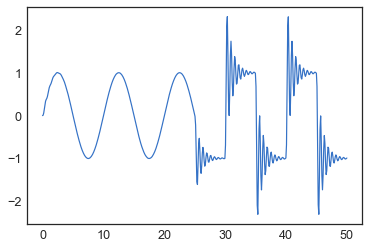

In [30]:
x0 = [0,0,0]

sol = solve_ivp(fy_dxdt, [0, N], x0,
               args=[u, Omega0, eta, b0, b1],t_eval=t_eval)
plt.figure()
plt.plot(sol.t, sol.y[2].T)
plt.show()

In [35]:
sim_cvi = {"time": t_eval,"vstup":u(t_eval), "výstup":sol.y[1]}

In [37]:
sim_cvi = pd.DataFrame(sim_cvi)
sim_cvi.to_csv("sim_cvi.csv", index=0)